## Customer Churn

In [1]:
# Importando Bibliotecas Necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# Importando os dados de treino
df = pd.read_csv("projeto4_telecom_treino.csv", sep = ",", encoding_errors='ignore')

In [3]:
# Mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)

In [4]:
df.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    KS             128  area_code_415                 no   
1           2    OH             107  area_code_415                 no   
2           3    NJ             137  area_code_415                 no   
3           4    OH              84  area_code_408                yes   
4           5    OK              75  area_code_415                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls churn  
0                              1    no  
1                              1    no  
2                              0    no  
3                              2    no  
4                              3    no

In [5]:
df.tail()

Unnamed: 0 state  account_length      area_code international_plan  \
3328        3329    AZ             192  area_code_415                 no   
3329        3330    WV              68  area_code_415                 no   
3330        3331    RI              28  area_code_510                 no   
3331        3332    CT             184  area_code_510                yes   
3332        3333    TN              74  area_code_415                 no   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
3328               77             26.55              215.5              126   
3329               57             39.29              153.4               55   
3330              109             30.74              288.8               58   
3331              105             36.35              159.6               84   
3332              113             39.85              265.9               82   

      total_eve_charge  total_night_minutes  total_night_calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total_night_charge  total_intl_minutes  total_intl_calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total_intl_charge  number_customer_service_calls churn  
3328               2.67                              2    no  
3329               2.59                              3    no  
3330               3.81                              2    no  
3331               1.35                              2    no  
3332               3.70                              0    no

In [6]:
df.shape

(3333, 21)

In [7]:
df = df.drop_duplicates()

In [8]:
# Substituindo no por 0
df.replace('no',0, inplace = True)


In [9]:
# Substituindo yes por 1
df.replace('yes',1, inplace = True)

In [10]:
# Apagando o texto area_code_ do campo area_code
df.replace({'area_code_':''}, regex = True, inplace = True)

In [11]:
# Excluindo primeira coluna (sequencial)
del df['Unnamed: 0']

In [12]:
# Excluindo a variável state
del df['state']

In [13]:
# Excluindo a variável area_code
# del df['area_code']

In [14]:
df.head()

account_length area_code  international_plan  voice_mail_plan  \
0             128       415                   0                1   
1             107       415                   0                1   
2             137       415                   0                0   
3              84       408                   1                0   
4              75       415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  
0                              1      0  
1                              1      0  
2                              0      0  
3                              2      0  
4                              3      0

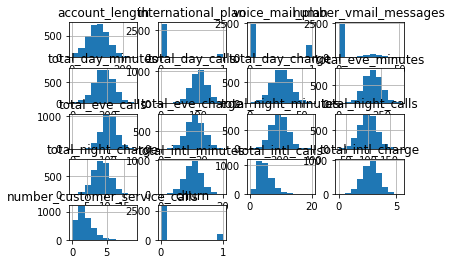

In [15]:
df.hist()
plt.show()

In [16]:
# Resumo estatístico
df.describe()

account_length  international_plan  voice_mail_plan  \
count     3333.000000         3333.000000      3333.000000   
mean       101.064806            0.096910         0.276628   
std         39.822106            0.295879         0.447398   
min          1.000000            0.000000         0.000000   
25%         74.000000            0.000000         0.000000   
50%        101.000000            0.000000         0.000000   
75%        127.000000            0.000000         1.000000   
max        243.000000            1.000000         1.000000   

       number_vmail_messages  total_day_minutes  total_day_calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.700000        87.000000   
50%                 0.000000         179.400000       101.000000   
75%                20.000000         216.400000       114.000000   
max                51.000000         350.800000       165.000000   

       total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
count       3333.000000        3333.000000      3333.000000       3333.000000   
mean          30.562307         200.980348       100.114311         17.083540   
std            9.259435          50.713844        19.922625          4.310668   
min            0.000000           0.000000         0.000000          0.000000   
25%           24.430000         166.600000        87.000000         14.160000   
50%           30.500000         201.400000       100.000000         17.120000   
75%           36.790000         235.300000       114.000000         20.000000   
max           59.640000         363.700000       170.000000         30.910000   

       total_night_minutes  total_night_calls  total_night_charge  \
count          3333.000000        3333.000000         3333.000000   
mean            200.872037         100.107711            9.039325   
std              50.573847          19.568609            2.275873   
min              23.200000          33.000000            1.040000   
25%             167.000000          87.000000            7.520000   
50%             201.200000         100.000000            9.050000   
75%             235.300000         113.000000           10.590000   
max             395.000000         175.000000           17.770000   

       total_intl_minutes  total_intl_calls  total_intl_charge  \
count         3333.000000       3333.000000        3333.000000   
mean            10.237294          4.479448           2.764581   
std              2.791840          2.461214           0.753773   
min              0.000000          0.000000           0.000000   
25%              8.500000          3.000000           2.300000   
50%             10.300000          4.000000           2.780000   
75%             12.100000          6.000000           3.270000   
max             20.000000         20.000000           5.400000   

       number_customer_service_calls        churn  
count                    3333.000000  3333.000000  
mean                        1.562856     0.144914  
std                         1.315491     0.352067  
min                         0.000000     0.000000  
25%                         1.000000     0.000000  
50%                         1.000000     0.000000  
75%                         2.000000     0.000000  
max                         9.000000     1.000000

In [17]:
df.dtypes

account_length                     int64
area_code                         object
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [18]:
# Convertendo a variável area_code para int
df['area_code'] = df['area_code'].astype('int')

In [19]:
# Verificando se existe algum registro NA
df.isna().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [20]:
# Verificando se existe algum registro Null
df.isnull().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [21]:
df.shape

(3333, 19)

## Separando a variável churn

In [22]:
# Variável TARGET(churn)
y_treino = df.churn

In [23]:
# Variáveis de Entrada
X_treino = df.drop('churn', axis = 1)

## Analisando a correlação entre as variáveis

In [24]:
corr = X_treino.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_164692/3733241504.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [25]:
# Excluindo colunas com correlação acima de 0.70 e gravando o resultado na variável X
excluir_colunas = ['number_vmail_messages','total_day_minutes','total_eve_charge',
                   'total_night_charge','total_intl_charge']

X_treino.drop(excluir_colunas, axis = 1, inplace = True) 


In [26]:
# Verificando a correlação após a exclusão das colunas
corr = X_treino.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_164692/2815337105.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [27]:
# Shape dos dados após seleção das variáveis
X_treino.shape

(3333, 13)

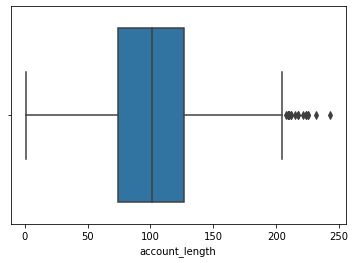

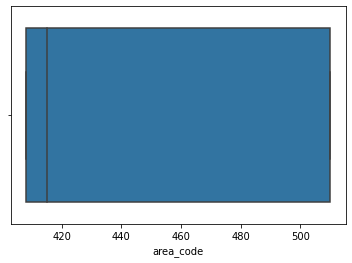

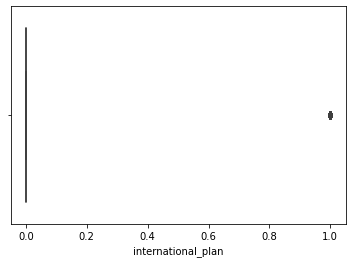

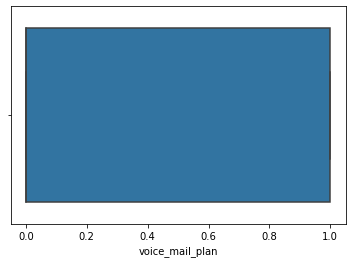

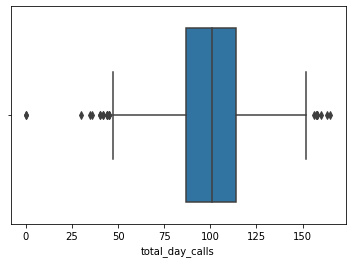

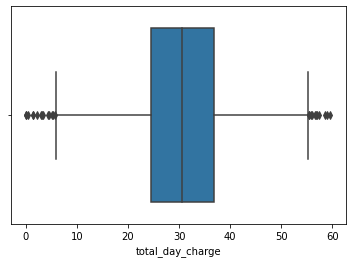

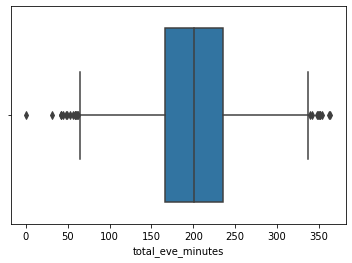

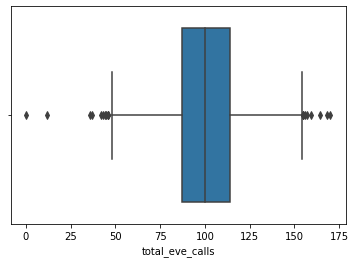

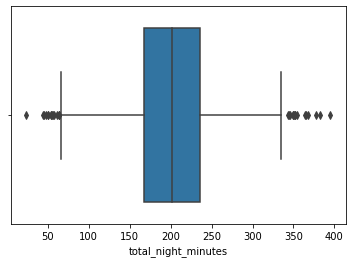

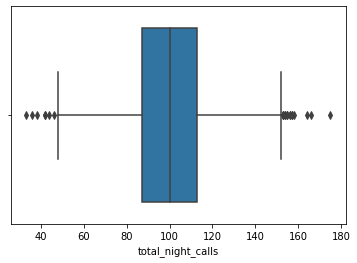

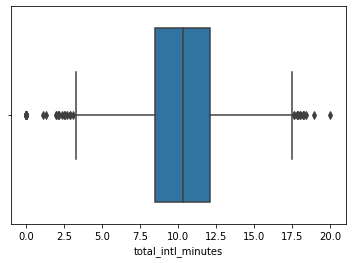

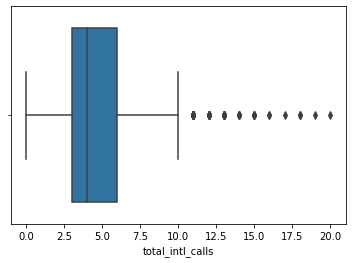

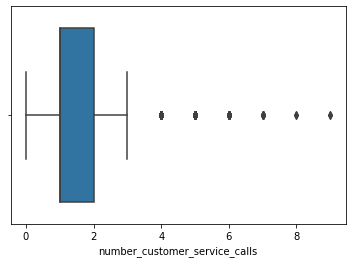

In [28]:
for coluna in X_treino.columns:
    boxplot = sbn.boxplot(x=X_treino[coluna])
    plt.show()
    

### Balanceamento de Classes

In [29]:
# Verificando a proporção de 0 e 1 nas classes
y_treino.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [30]:
# As classes estão desbalanceadas
# Será necessário utilizar o recurso da biblioteca imblearn para balancear
import imblearn
from imblearn.over_sampling import SMOTE

In [31]:
# Serão criados dados sintéticos para a classe 1
over_sampler = SMOTE(k_neighbors = 5)
X_btreino, y_btreino = over_sampler.fit_resample(X_treino, y_treino)

In [32]:
# Verificando se as classes ficaram balanceadas após o processamento
y_btreino.value_counts()

0    2850
1    2850
Name: churn, dtype: int64

### Normalização dos dados

In [33]:
# A normalização dos dados é um pré requisito para o modelo de regressão logística
# Será utilizado aqui o método StandardScaler da Scikit-Learn
from sklearn.preprocessing import StandardScaler

X_btreino = StandardScaler().fit_transform(X_btreino)

### Algoritmo Regressão Logística

In [34]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l2']}

In [35]:
# Criaremos o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1,                        
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [36]:
# Treinamento do modelo
modelo_v1.fit(X_btreino, y_btreino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l2']},
             scoring='roc_auc')

In [37]:
# Melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=0.01)

### Importando dados de teste

In [38]:
# Importando os dados de treino
df_teste = pd.read_csv("projeto4_telecom_teste.csv", sep = ",", encoding_errors='ignore')

In [39]:
df_teste.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    HI             101  area_code_510                 no   
1           2    MT             137  area_code_510                 no   
2           3    OH             103  area_code_408                 no   
3           4    NM              99  area_code_415                 no   
4           5    SC             108  area_code_415                 no   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0              no                      0               70.9              123   
1              no                      0              223.6               86   
2             yes                     29              294.7               95   
3              no                      0              216.8              123   
4              no                      0              197.4               78   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             12.05              211.9               73             18.01   
1             38.01              244.8              139             20.81   
2             50.10              237.3              105             20.17   
3             36.86              126.4               88             10.74   
4             33.56              124.0              101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls churn  
0                              3    no  
1                              0    no  
2                              1    no  
3                              1    no  
4                              2    no

In [40]:
# Substituindo no por 0
df_teste.replace('no',0, inplace = True)

In [41]:
# Substituindo yes por 1
df_teste.replace('yes',1, inplace = True)

In [42]:
# Apagando o texto area_code_ do campo area_code
df_teste.replace({'area_code_':''}, regex = True, inplace = True)

In [43]:
# Convertendo a variável area_code para int
df_teste['area_code'] = df_teste['area_code'].astype('int')

In [44]:
# Selecionando as mesmas variáveis utilizadas no treinamento
X_teste = df_teste[X_treino.columns]

In [45]:
# Selecionando a variável target
y_teste = df_teste.churn

In [46]:
X_teste.head()

account_length  area_code  international_plan  voice_mail_plan  \
0             101        510                   0                0   
1             137        510                   0                0   
2             103        408                   0                1   
3              99        415                   0                0   
4             108        415                   0                0   

   total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0              123             12.05              211.9               73   
1               86             38.01              244.8              139   
2               95             50.10              237.3              105   
3              123             36.86              126.4               88   
4               78             33.56              124.0              101   

   total_night_minutes  total_night_calls  total_intl_minutes  \
0                236.0                 73                10.6   
1                 94.2                 81                 9.5   
2                300.3                127                13.7   
3                220.6                 82                15.7   
4                204.5                107                 7.7   

   total_intl_calls  number_customer_service_calls  
0                 3                              3  
1                 7                              0  
2                 6                              1  
3                 2                              1  
4                 4                              2

In [47]:
# Normalizando os dados de teste
X_teste = StandardScaler().fit_transform(X_teste)

### Previsão com os dados de teste

In [48]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [49]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [50]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [51]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[819, 624],
       [ 37, 187]])

In [52]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [53]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.7011944980694981


In [54]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [55]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.8120606870606871


In [56]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6034793041391722
